<a href="https://colab.research.google.com/github/oguzhansarigol/Machine-Learning-Oguzhan-Sarigol/blob/main/Banka_M%C3%BC%C5%9Fteri_Kayb%C4%B1_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gerekli Kütüphaneler

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Database

Bu veri seti, bir bankanın müşterilerine ait çeşitli özellikleri ve bu müşterilerin bankayı terk edip etmediğini ("Exited" sütunu) içermektedir.
Veri setindeki temel amaç, müşterilerin bankadan ayrılmasını etkileyen faktörleri incelemek ve bu durumu tahmin edebilmektir.

Veri setinde bulunan bazı sütunlar şunlardır:
- CreditScore: Müşterinin kredi puanı
- Geography: Müşterinin yaşadığı ülke (France, Spain, Germany)
- Gender: Müşterinin cinsiyeti (Male, Female)
- Age: Müşterinin yaşı
- Balance: Müşterinin bankadaki hesap bakiyesi
- NumOfProducts: Müşterinin sahip olduğu ürün sayısı
- HasCrCard: Müşterinin kredi kartı sahip olup olmadığı (1: Evet, 0: Hayır)
- IsActiveMember: Müşterinin aktif bir banka üyesi olup olmadığı (1: Evet, 0: Hayır)
- EstimatedSalary: Müşterinin tahmini maaşı
- Exited: Müşterinin bankayı terk edip etmediği (1: Evet, 0: Hayır) [Hedef değişken]

Bu görselleştirmeler, müşterilerin demografik ve finansal özelliklerinin dağılımını ve bu özelliklerin müşteri kaybıyla olan ilişkisini anlamaya yöneliktir.


In [97]:
#Database: https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset

In [98]:
df=pd.read_csv("churn.csv")

# Data Visualization

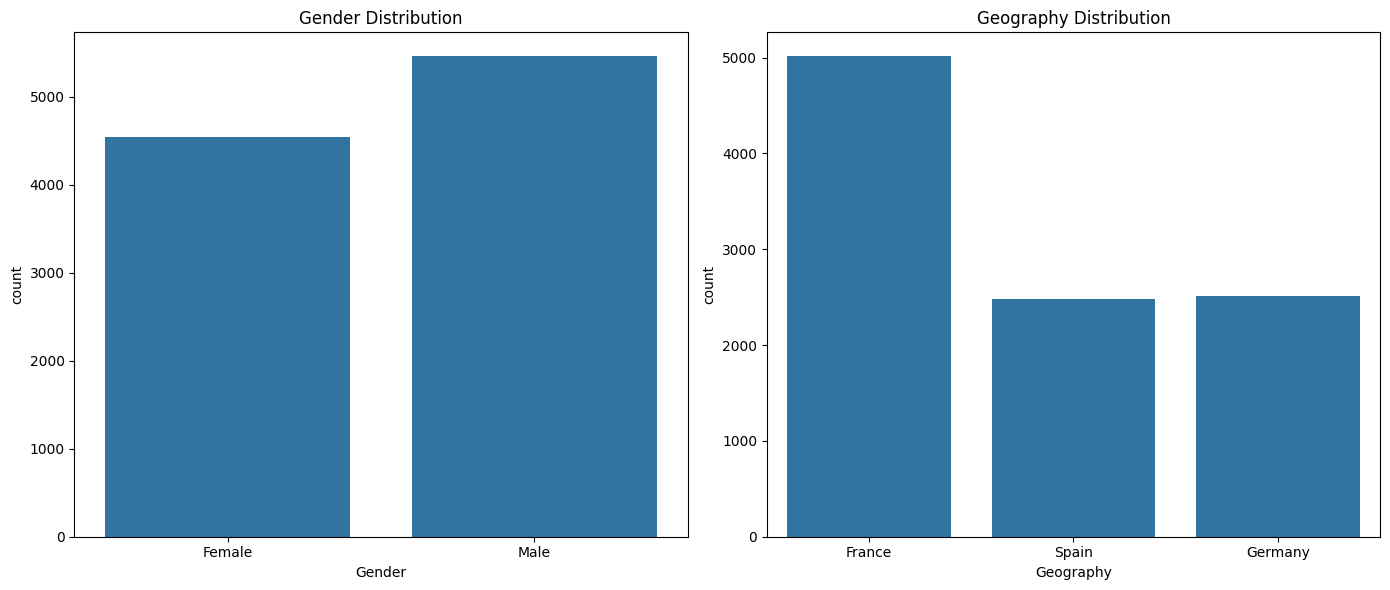

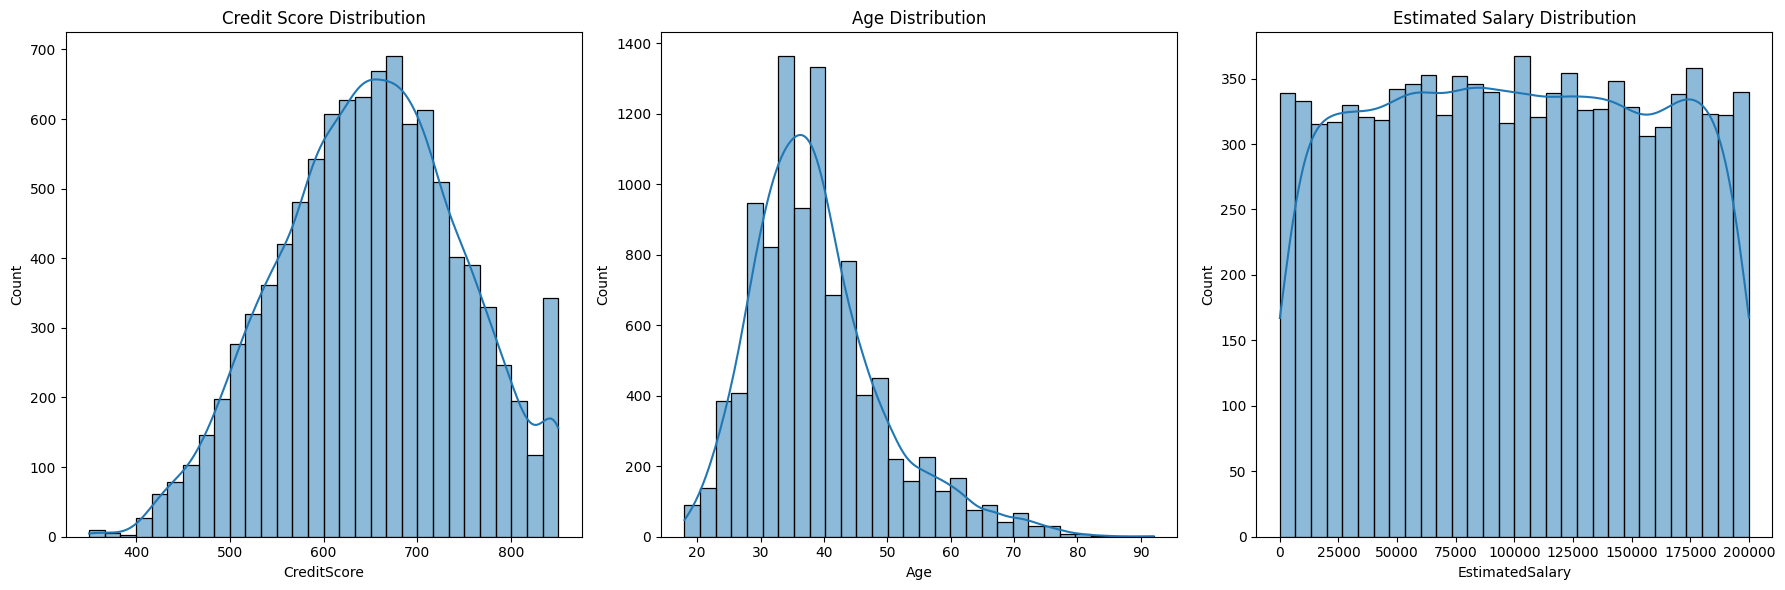

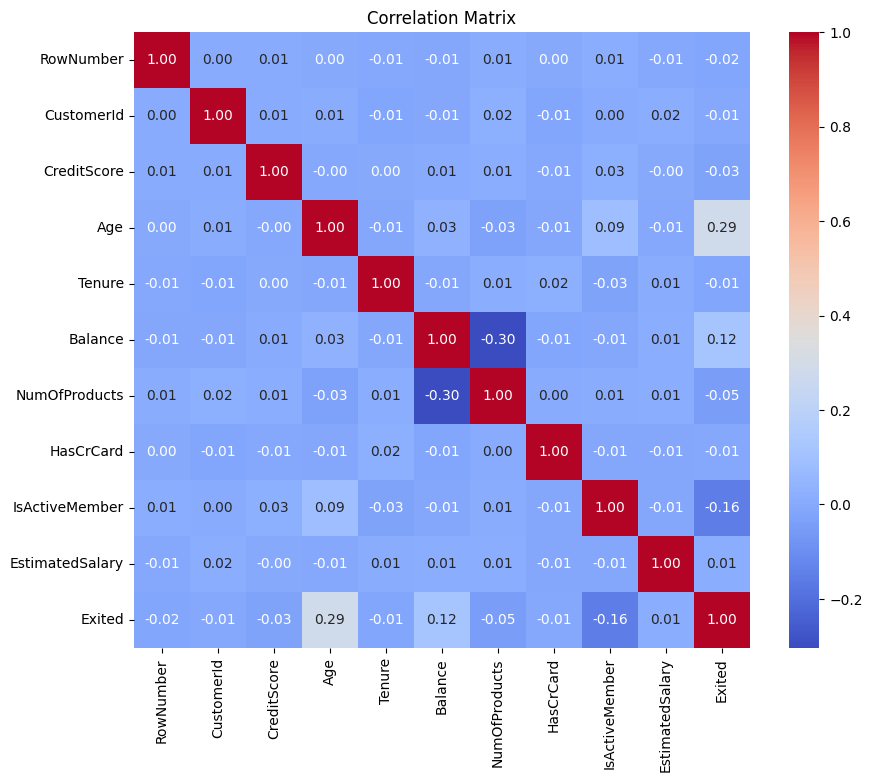

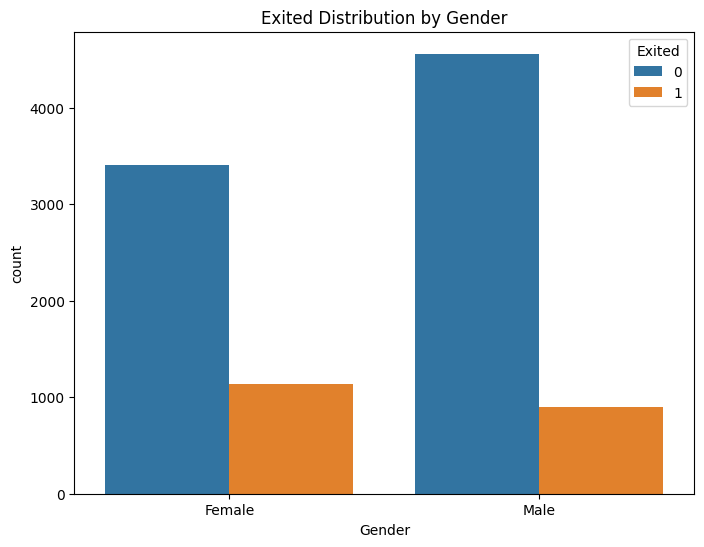

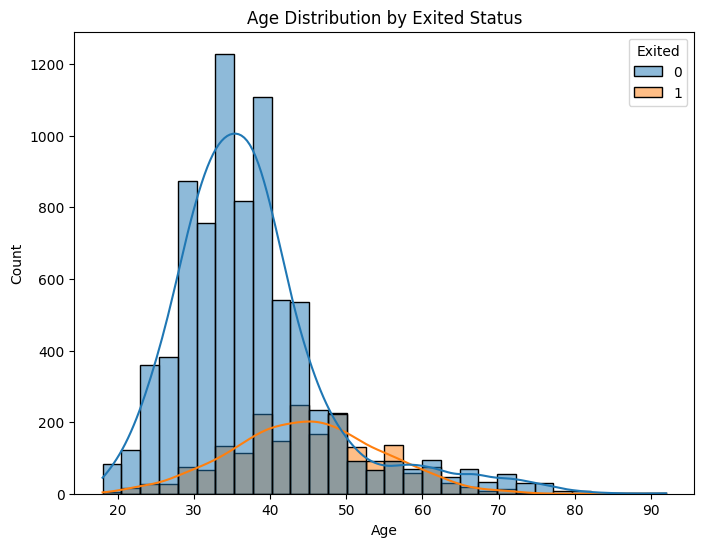

In [99]:
# 1. Kategorik değişkenlerin dağılımı (Cinsiyet ve Coğrafya)
plt.figure(figsize=(14, 6))

# Cinsiyet dağılımı
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')

# Coğrafi bölge dağılımı
plt.subplot(1, 2, 2)
sns.countplot(x='Geography', data=df)
plt.title('Geography Distribution')

plt.tight_layout()
plt.show()

# 2. Sayısal değişkenlerin dağılımı (Kredi Puanı, Yaş, Maaş)
plt.figure(figsize=(18, 6))

# Kredi puanı dağılımı
plt.subplot(1, 3, 1)
sns.histplot(df['CreditScore'], kde=True, bins=30)
plt.title('Credit Score Distribution')

# Yaş dağılımı
plt.subplot(1, 3, 2)
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')

# Maaş dağılımı
plt.subplot(1, 3, 3)
sns.histplot(df['EstimatedSalary'], kde=True, bins=30)
plt.title('Estimated Salary Distribution')

plt.tight_layout()
plt.show()

# 3. Korelasyon matrisi
plt.figure(figsize=(10, 8))
corr_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# 4. Müşteri kaybı analizi - Cinsiyete göre Exited dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Exited Distribution by Gender')
plt.show()

# 5. Müşteri kaybı analizi - Yaşın Exited üzerindeki etkisi
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Exited', kde=True, bins=30)
plt.title('Age Distribution by Exited Status')
plt.show()

# **Machine Learning Process**

In [100]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [101]:
df=df.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [102]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [104]:
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

In [105]:
y=df["Exited"]
x=df.drop(["Exited"],axis=1)

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=16)

In [107]:
rf=RandomForestClassifier()
model=rf.fit(x_train,y_train)
model.score(x_test,y_test)

0.8583333333333333

In [108]:
model.predict([[712,22,3,0,5,1,1,200000,False,False,True]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

# One Hot Encoder

In [109]:
from sklearn.preprocessing import OneHotEncoder

In [110]:
df=pd.read_csv('churn.csv')
df=df.drop(columns=["RowNumber","CustomerId","Surname"])

In [111]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [112]:
ohe=OneHotEncoder()

In [113]:
xd=ohe.fit_transform(df[['Geography',"Gender"]]).toarray()

In [114]:
ohe.get_feature_names_out()

array(['Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'], dtype=object)

In [115]:
xd=pd.DataFrame(xd)

In [116]:
xd.columns=ohe.get_feature_names_out()

In [117]:
xd

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,1.0
9996,1.0,0.0,0.0,0.0,1.0
9997,1.0,0.0,0.0,1.0,0.0
9998,0.0,1.0,0.0,0.0,1.0


In [118]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [119]:
df=df.drop(columns=["Geography","Gender"])

In [120]:
df[xd.columns]=xd

In [121]:
y=df['Exited']
x=df.drop("Exited",axis=1)

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
tree=DecisionTreeClassifier()
model=tree.fit(x,y)
model.score(x,y)

# Overfiting Oldu :(

1.0

In [124]:
ohe.transform([["France","Female"]]).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0., 1., 0.]])